In [37]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [38]:
from transformers import MarianTokenizer

#load tokenizer
model_name = "Helsinki-NLP/opus-mt-en-cs"
tokenizer = MarianTokenizer.from_pretrained(model_name)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   prompt                   94 non-null     object
 1   response                 94 non-null     object
 2   claims                   94 non-null     object
 3   claims_factuality_label  94 non-null     object
 4   claim_checkworthiness    94 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB
None


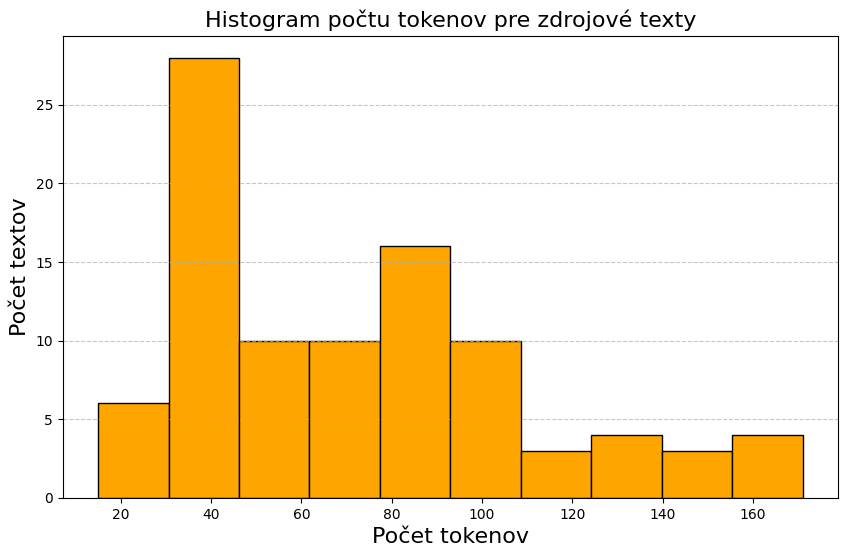

In [39]:
with open('./translate/translated_new.json', 'r') as file:
    translated_data = json.load(file)

#each claim on as individual data
df = pd.DataFrame(translated_data)
print(df.info())
df['num_claims'] = df['claims'].apply(len)
df['source_len'] = df['response'].apply(len)
df['source_tokens'] = df['response'].apply(lambda x: nltk.word_tokenize(x))
df['source_token_counts'] = df['source_tokens'].apply(len)
# Plot a histogram of word token counts
plt.figure(figsize=(10, 6))
plt.hist(df['source_token_counts'], bins=10, color='orange', edgecolor='black')
plt.title('Histogram počtu tokenov pre zdrojové texty', fontsize=16)
plt.xlabel('Počet tokenov',fontsize=16)
plt.ylabel('Počet textov',fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [40]:
#evaluate individual claims
df = df.explode(['claim_checkworthiness','claims'])
df = df.reset_index(drop=True)
df = df.explode(['claim_checkworthiness','claims'])
df = df.reset_index(drop=True)
df.head(5)

,prompt,response,claims,claims_factuality_label,claim_checkworthiness,num_claims,source_len,source_tokens,source_token_counts
0,Who was the oldest justice on the US supreme c...,"V roce 1980, nejstarším soudcem Nejvyššího sou...",V roce 1980 byl nejstarším soudcem Nejvyššího ...,"[[False], [True, True], [False, False]]",factual,3,320,"[V, roce, 1980, ,, nejstarším, soudcem, Nejvyš...",62
1,Who was the oldest justice on the US supreme c...,"V roce 1980, nejstarším soudcem Nejvyššího sou...",Soudce William O. Douglas se narodil 16. října...,"[[False], [True, True], [False, False]]",factual,3,320,"[V, roce, 1980, ,, nejstarším, soudcem, Nejvyš...",62
2,Who was the oldest justice on the US supreme c...,"V roce 1980, nejstarším soudcem Nejvyššího sou...",Soudce William O. Douglas sloužil u Nejvyššího...,"[[False], [True, True], [False, False]]",factual,3,320,"[V, roce, 1980, ,, nejstarším, soudcem, Nejvyš...",62
3,Who was the oldest justice on the US supreme c...,"V roce 1980, nejstarším soudcem Nejvyššího sou...",V roce 1980 byl soudce William O. Douglas stál...,"[[False], [True, True], [False, False]]",factual,3,320,"[V, roce, 1980, ,, nejstarším, soudcem, Nejvyš...",62
4,Who was the oldest justice on the US supreme c...,"V roce 1980, nejstarším soudcem Nejvyššího sou...",Soudce William O. Douglas byl nejstarším soudc...,"[[False], [True, True], [False, False]]",factual,3,320,"[V, roce, 1980, ,, nejstarším, soudcem, Nejvyš...",62


       num_claims  source_len  source_token_counts  claim_token_counts
count  678.000000  678.000000           678.000000          678.000000
mean     3.800885  477.063422            83.172566           11.876106
std      1.670015  227.061540            38.411148            5.384972
min      1.000000   83.000000            15.000000            5.000000
25%      3.000000  264.000000            47.000000            8.000000
50%      4.000000  430.000000            80.000000           11.000000
75%      5.000000  634.750000           107.000000           14.000000
max      9.000000  978.000000           171.000000           49.000000


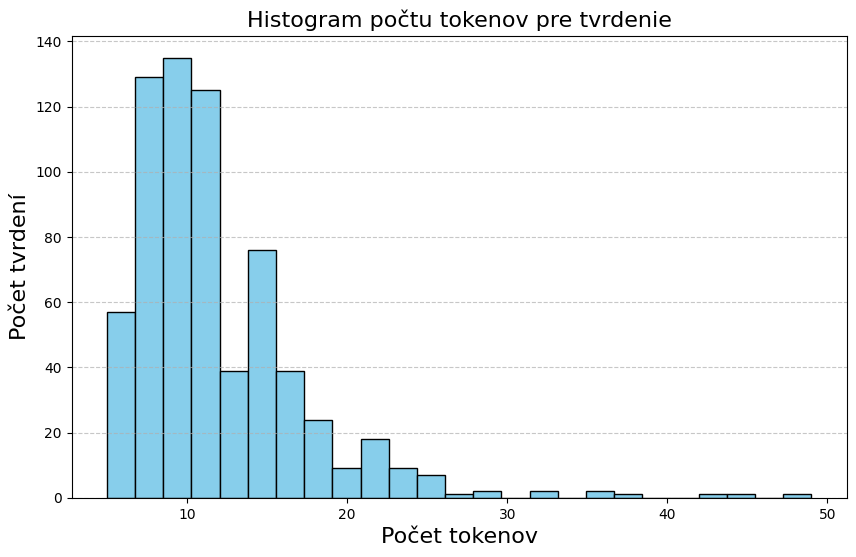

Non checkworthy claims 17 from 678 which is 97.49%


In [44]:
df = df.dropna(subset=['claims']).reset_index(drop=True)
df['claim_tokens'] = df['claims'].apply(lambda x: nltk.word_tokenize(x))
df['claim_token_counts'] = df['claim_tokens'].apply(len)
print(df.describe())


# Plot a histogram of word token counts
plt.figure(figsize=(10, 6))
plt.hist(df['claim_token_counts'], bins=25, color='skyblue', edgecolor='black')
plt.title('Histogram počtu tokenov pre tvrdenie', fontsize=16)
plt.xlabel('Počet tokenov',fontsize=16)
plt.ylabel('Počet tvrdení',fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

filtered_df = df.query('claim_checkworthiness == "factual"')
print("Non checkworthy claims %d from %d which is %.2f%%" % (len(df)-len(filtered_df), len(df), (len(filtered_df) / len(df)) * 100))
